Simple Linear Regression using sklearn

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using this dataset we are trying to establish a relationship between Median Income vs Median HouseValues        

medianIncome(x): Median income for households within a block of houses (measured in tens of thousands of US Dollars)

medianHouseValue(y): Median house value for households within a block (measured in US Dollars)

In [146]:
data= pd.read_csv('housing.csv')

In [147]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [148]:
data.shape

(20640, 10)

In [149]:
data = data.iloc[:2000:10]

In [150]:
data.shape

(200, 10)

In [151]:
import seaborn as sns

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

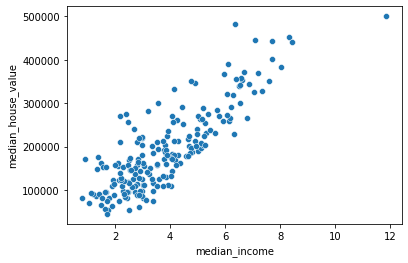

In [152]:
sns.scatterplot(x='median_income',y='median_house_value',data=data)

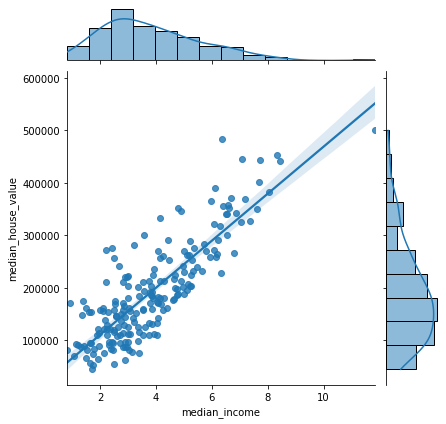

In [153]:
sns.jointplot(x=data['median_income'], y=data['median_house_value'], data=data, kind='reg')

In [154]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [155]:
X= data[['median_income']]
y= data[['median_house_value']]

In [156]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

In [157]:
print("Features Training shape", X_train.shape)
print("Labels Training shape", y_train.shape)
print("Features Testing shape", X_test.shape)
print("Labels Testing shape", y_test.shape)

Features Training shape (140, 1)
Labels Training shape (140, 1)
Features Testing shape (60, 1)
Labels Testing shape (60, 1)


In [158]:
lin= linear_model.LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [159]:
predictions= lin.predict(X_test)

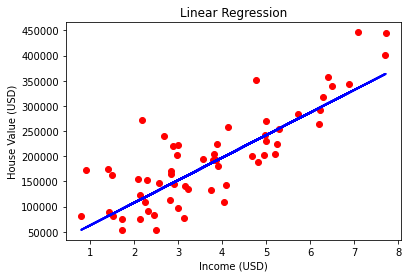

In [160]:
plt.scatter(X_test, y_test, c='r')
plt.plot(X_test, predictions, linewidth=2, c='b')
plt.xlabel('Income (USD)')
plt.ylabel('House Value (USD)')
plt.title('Linear Regression')
plt.show()

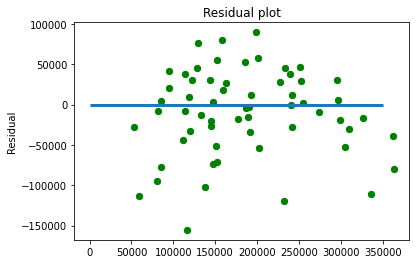

In [161]:
plt.scatter(lin.predict(X_test), lin.predict(X_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=350000, linewidth=3)
plt.title('Residual plot')
plt.ylabel('Residual')
plt.show()